# Gradient Descent

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

In [3]:
def difference_quotient(f, x, epsilon):
    return (f(x+epsilon) - f(x-epsilon))/epsilon

In [4]:
def di(v, i, epsilon=0.00001):
    """
    estimate partial derivative with respect to v_i of sum_of_squares at v
    """
    v_plus = sum_of_squares((v_j+epsilon) if j==i else v_j for j, v_j in enumerate(v))
    v_minus = sum_of_squares((v_j-epsilon) if j==i else v_j for j, v_j in enumerate(v))
    return -(v_plus-v_minus) / (2*epsilon)

In [5]:
from itertools import product
n=10
X = np.linspace(-10, 10, num=n)
Y = np.linspace(-10, 10, num=n)
U, V = np.meshgrid(X, Y)

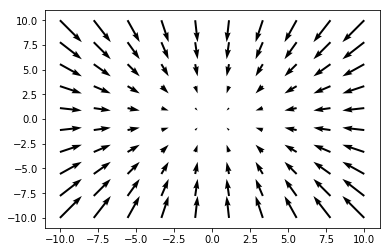

In [6]:
plt.quiver(X, Y, di((U,V), 0), di((U,V), 1))
plt.show()

In [7]:
def partial_difference_quotient(f, v, i, epsilon=0.00001):
    """
    compute the ith partial difference quotient of f at v
    """
    v0 = [(v_j-epsilon) if j==i else v_j for j, v_j in enumerate(v)]
    v1 = [(v_j+epsilon) if j==i else v_j for j, v_j in enumerate(v)]
    return (f(v1) - f(v0)) / (2*epsilon)

In [8]:
def estimate_gradient(f, v, epsilon=0.00001):
    return [partial_difference_quotient(f, v, i, epsilon) for i, _ in enumerate(v)]


In [9]:
estimate_gradient(sum_of_squares, (0.2, 0.2))

[0.4000000000004, 0.4000000000004]

In [10]:
def step(v, direction, step_size):
    """
    move step_size in the direction from v
    """
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

In [11]:
def distance(v, w):
    return math.sqrt(sum((vi-wi)**2 for vi, wi in zip(v,w)))

In [12]:
tolerance = 0.0000001

In [13]:
v = [random.randint(-10,10) for i in range(3)]

In [14]:
print(v)

[-8, 0, 1]


In [15]:
while True:
    gradient = estimate_gradient(sum_of_squares, v)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v

In [16]:
v

[-4.910792425263791e-06, 0.0, 6.138490531510839e-07]